In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import json
from config import hwkey
import random
import seaborn as sns
import requests

In [2]:
#Generate Random Cities and holding file

lat = np.arange(-90,90,15)
lon = np.arange(-200,200,15)

randomcity_df = pd.DataFrame()
randomcity_df["Latitude"] = ""
randomcity_df["Longitude"]=""

for xlat in lat:
    for ylong in lon:
        latv = list(np.arange(xlat,xlat+10,0.01))
        lonv = list(np.arange(ylong,ylong+10,0.01))
        randomlat = random.sample(latv,50)
        randomlon = random.sample(lonv,50)
        lat_sample = [(xlat+dec_lat) for dec_lat in randomlat]
        lon_sample = [ylong+dec_lon for dec_lon in randomlon]
        randomcity_df = randomcity_df.append(pd.DataFrame.from_dict({"Latitude":lat_sample,
                                       "Longitude":lon_sample}))
randomcity_df = randomcity_df.reset_index(drop=True)
randomcity_df.shape

(16200, 2)

In [3]:
randomcity_df["City Name"] = ""
randomcity_df["Country"]= ""
for index,row in randomcity_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    randomcity_df.set_value(index,"City Name", city.city_name)
    randomcity_df.set_value(index,"Country",city.country_code)
randomcity_df.head()

,Latitude,Longitude,City Name,Country
0,-171.72,-393.49,vaini,to
1,-177.16,-391.08,vaini,to
2,-177.20,-397.45,vaini,to
3,-171.63,-399.23,vaini,to
4,-170.09,-398.71,vaini,to


In [4]:
#Data Munging
datadump = randomcity_df.drop(['Latitude','Longitude'], axis = 1)
datadump = datadump.drop_duplicates()
datadump.shape
datadump.head()

,City Name,Country
0,vaini,to
400,punta arenas,cl
450,ushuaia,ar
700,bredasdorp,za
750,port elizabeth,za


In [5]:
#Generate cities from information above
gen_city = datadump.sample(n=500)
gen_city

,City Name,Country
11523,mustasaari,fi
6353,christchurch,nz
8811,zemio,cf
11605,strezhevoy,ru
8650,boa vista,br
10201,taft,ir
7501,mahebourg,mu
11540,oksfjord,no
10147,lagos,pt
6660,ruatoria,nz


In [14]:
#Weather API from Cities posted above
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"appid" : hwkey, "units":"metric"}
#Add columns to data frame
gen_city["Latitude"] = ""
gen_city["Longitude"] = ""
gen_city["Temperature"] = ""
gen_city["Humidity"] = ""
gen_city["Cloudiness"] = ""
gen_city["Wind Speed"] = ""

In [15]:
#itterate through panda data frame
for index,row in gen_city.iterrows():
    #city_name = row['City Name']
    params["q"] = f'{row["City Name"]},{row["Country"]}'
    #API Request
    query_url = f"{url}appid={hwkey}&units ={units}q="
    #print(f"Retrieving Results for Index {params['q']}.")
    city_response = requests.get(query_url,params)
    city_response = city_response.json()
   

    gen_city.set_value(index,"Latitude",city_response.get("coord",{}).get("lat"))
    gen_city.set_value(index,"Longitude",city_response.get("coord",{}).get("lon"))
    gen_city.set_value(index,"Temperature",city_response.get("main",{}).get("temp_max"))
    gen_city.set_value(index,"Humidity",city_response.get("main",{}).get("humidity"))
    gen_city.set_value(index,"Cloudiness",city_response.get("clouds",{}).get("all"))
    gen_city.set_value(index,"Wind Speed",city_response.get("wind",{}).get("speed"))


In [16]:
gen_city.head()

,City Name,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
11523,mustasaari,fi,63.17,21.67,-4,62,24,4.1
6353,christchurch,nz,-43.53,172.64,14,67,0,5.7
8811,zemio,cf,5.02,25.13,35.35,40,0,1.66
11605,strezhevoy,ru,60.73,77.6,3,55,0,6
8650,boa vista,br,2.82,-60.67,26,74,75,5.7


In [19]:
#Data Frame to CSV
gen_city.to_csv("World_City_Weather.csv")

In [22]:
#Scatter Plot 1 - Temperature vs Latitude
gen_city["Latitude"] = pd.to_numeric(gen_city["Latitude"])
gen_city["Temperature"] = pd.to_numeric(gen_city["Temperature"])
gen_city.plot(kind = "scatter", x="Latitude", y="Temperature", grid = True, color="green")

C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


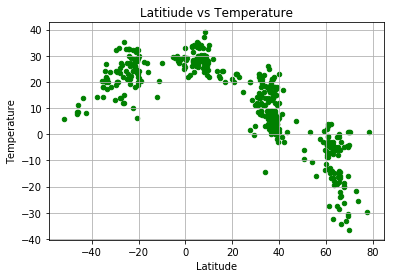

In [23]:
    plt.title("Latitiude vs Temperature")
    plt.ylabel("Temperature")
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.savefig("Lat vs Temp")
    plt.show()

In [24]:
#Graph shows that the farther the latitide moves from 0 the older it becomes

In [25]:
#Humidity vs Latitude
gen_city["Latitude"] = pd.to_numeric(gen_city["Latitude"])
gen_city["Humidity"] = pd.to_numeric(gen_city["Humidity"])
gen_city.plot(kind = "scatter", x="Latitude", y="Humidity", grid = True, color="green")

C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


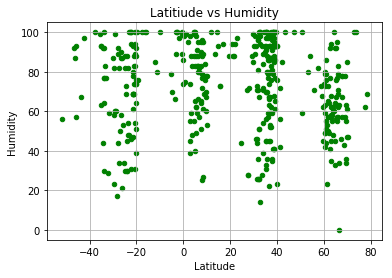

In [26]:
    plt.title("Latitiude vs Humidity")
    plt.ylabel("Humidity")
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.savefig("Lat vs Hum")
    plt.show()

In [31]:
#Cloudiness vs Latitude
gen_city["Latitude"] = pd.to_numeric(gen_city["Latitude"])
gen_city["Cloudiness"] = pd.to_numeric(gen_city["Cloudiness"])
gen_city.plot(kind = "scatter", x="Latitude", y="Cloudiness", grid = True, color="blue")

C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


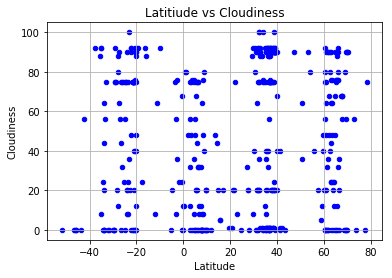

In [32]:
    plt.title("Latitiude vs Cloudiness")
    plt.ylabel("Cloudiness")
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.savefig("Lat vs Clouds")
    plt.show()

In [29]:
#Wind Speed vs Latitude
gen_city["Latitude"] = pd.to_numeric(gen_city["Latitude"])
gen_city["Wind Speed"] = pd.to_numeric(gen_city["Wind Speed"])
gen_city.plot(kind = "scatter", x="Latitude", y="Temperature", grid = True, color="green")

C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\elliott\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


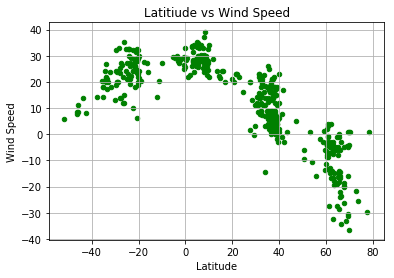

In [30]:
    plt.title("Latitiude vs Wind Speed")
    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.savefig("Lat vs W_Speed")
    plt.show()

In [ ]:
#Wind Speeds tend to belarger